<a href="https://colab.research.google.com/github/hublun/TWSApi/blob/master/Copy_of_IBApi_Historical_T_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_pickle('/content/Data_MNQ20201129  20:11:15_20201204  20:11:15.pkl')

In [ ]:
df["Time"] = pd.to_datetime(df["time"], format='%Y%m%d  %H:%M:%S', yearfirst=True)

In [ ]:
df.drop('time', axis=1, inplace=True)

In [ ]:
df["Hour"] = pd.DatetimeIndex(df["Time"]).hour
df["Minute"] = pd.DatetimeIndex(df["Time"]).minute
df["Second"] = pd.DatetimeIndex(df["Time"]).second
df["Day"] = pd.DatetimeIndex(df["Time"]).day

In [ ]:
initialDateTime = df.Time[0]
initialDateTime

Timestamp('2020-11-30 09:30:00')

In [ ]:
df["TradeDay"] = pd.TimedeltaIndex(df.Time - initialDateTime).days

In [ ]:
df.head()

,open,close,high,low,avg,volume,Time,Hour,Minute,Second,Day,TradeDay
0,12270.75,12272.50,12273.75,12268.00,12270.975,886,2020-11-30 09:30:00,9,30,0,30,0
1,12272.25,12272.75,12275.75,12272.25,12273.975,236,2020-11-30 09:30:05,9,30,5,30,0
2,12272.50,12276.75,12277.75,12272.50,12276.150,275,2020-11-30 09:30:10,9,30,10,30,0
3,12277.25,12278.00,12280.25,12276.75,12278.675,318,2020-11-30 09:30:15,9,30,15,30,0
4,12278.00,12275.75,12279.25,12275.00,12277.175,390,2020-11-30 09:30:20,9,30,20,30,0


In [ ]:
df.tail()

,open,close,high,low,avg,volume,Time,Hour,Minute,Second,Day,TradeDay
26095,12510.00,12509.50,12510.00,12509.00,12509.275,29,2020-12-04 16:59:35,16,59,35,4,4
26096,12509.75,12509.75,12509.75,12509.75,12509.750,9,2020-12-04 16:59:40,16,59,40,4,4
26097,12509.50,12509.25,12510.00,12509.25,12509.600,9,2020-12-04 16:59:45,16,59,45,4,4
26098,12508.75,12510.00,12510.00,12508.75,12509.425,22,2020-12-04 16:59:50,16,59,50,4,4
26099,12509.00,12511.00,12511.00,12509.00,12509.925,12,2020-12-04 16:59:55,16,59,55,4,4


In [ ]:
#df["mu10min"] = df.avg.rolling(window=120, min_periods=1).mean()

#df["mu5min"] = df.avg.rolling(window=60, min_periods=1).mean()
#df["mu2min"] = df.avg.rolling(window=24, min_periods=1).mean()
#df["mumin"] = df.avg.rolling(window=12, min_periods=1).mean()


df["dev"] = df.close - df.open


#df["delta1m"] = df.avg - df.mumin
#df["delta2m"] = df.avg - df.mu2min

#df["delta5m"] = df.avg - df.mu5min
#df["delta10m"] = df.avg - df.mu10min
df["delta1m"] = df.dev.rolling(window=12, min_periods=1).sum()
df["delta2m"] = df.dev.rolling(window=24, min_periods=1).sum()
df["delta5m"] = df.dev.rolling(window=60, min_periods=1).sum()
df["delta10m"] = df.dev.rolling(window=120, min_periods=1).sum() 

In [ ]:
df["std24"] = df.dev.rolling(window=24, min_periods=1).std()
df["mean24"] = df.dev.rolling(window=24, min_periods=1).mean()
df["t_val24"] = (df.dev - df.mean24) / df.std24

In [ ]:
df.head(n=100)

,open,close,high,low,avg,volume,Time,Hour,Minute,Second,Day,TradeDay,dev,delta1m,delta2m,delta5m,delta10m,std24,mean24,t_val24
0,12270.75,12272.50,12273.75,12268.00,12270.975,886,2020-11-30 09:30:00,9,30,0,30,0,1.75,1.75,1.75,1.75,1.75,NaN,1.750000,NaN
1,12272.25,12272.75,12275.75,12272.25,12273.975,236,2020-11-30 09:30:05,9,30,5,30,0,0.50,2.25,2.25,2.25,2.25,0.883883,1.125000,-0.707107
2,12272.50,12276.75,12277.75,12272.50,12276.150,275,2020-11-30 09:30:10,9,30,10,30,0,4.25,6.50,6.50,6.50,6.50,1.909407,2.166667,1.091089
3,12277.25,12278.00,12280.25,12276.75,12278.675,318,2020-11-30 09:30:15,9,30,15,30,0,0.75,7.25,7.25,7.25,7.25,1.712394,1.812500,-0.620477
4,12278.00,12275.75,12279.25,12275.00,12277.175,390,2020-11-30 09:30:20,9,30,20,30,0,-2.25,5.00,5.00,5.00,5.00,2.345208,1.000000,-1.385805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12264.75,12262.00,12265.25,12262.00,12263.825,196,2020-11-30 09:37:55,9,37,55,30,0,-2.75,7.00,-0.50,-33.50,-13.50,2.742496,-0.020833,-0.995140
96,12262.25,12260.00,12264.25,12259.75,12262.300,273,2020-11-30 09:38:00,9,38,0,30,0,-2.25,1.25,2.25,-40.50,-15.75,2.577929,0.093750,-0.909160
97,12260.50,12264.25,12264.25,12260.00,12261.600,210,2020-11-30 09:38:05,9,38,5,30,0,3.75,2.00,0.00,-36.25,-12.00,2.387695,0.000000,1.570552
98,12264.00,12264.25,12264.75,12262.00,12263.225,222,2020-11-30 09:38:10,9,38,10,30,0,0.25,-0.50,1.25,-28.75,-11.75,2.378549,0.052083,0.083209


In [ ]:
df["pb30sec"] = (df.avg - df.avg.shift(periods=6)).fillna(0.0)
df["pbmin"] = (df.avg - df.avg.shift(periods=12)).fillna(0.0)
df["pb5min"] = (df.avg - df.avg.shift(periods=5*12)).fillna(0.0)
df["pb10min"] = (df.avg - df.avg.shift(periods=10*12)).fillna(0.0)
df.head()

,open,close,high,low,avg,volume,Time,Hour,Minute,Second,Day,TradeDay,dev,delta1m,delta2m,delta5m,delta10m,std24,mean24,t_val24,pb30sec,pbmin,pb5min,pb10min
0,12270.75,12272.50,12273.75,12268.00,12270.975,886,2020-11-30 09:30:00,9,30,0,30,0,1.75,1.75,1.75,1.75,1.75,NaN,1.750000,NaN,0.0,0.0,0.0,0.0
1,12272.25,12272.75,12275.75,12272.25,12273.975,236,2020-11-30 09:30:05,9,30,5,30,0,0.50,2.25,2.25,2.25,2.25,0.883883,1.125000,-0.707107,0.0,0.0,0.0,0.0
2,12272.50,12276.75,12277.75,12272.50,12276.150,275,2020-11-30 09:30:10,9,30,10,30,0,4.25,6.50,6.50,6.50,6.50,1.909407,2.166667,1.091089,0.0,0.0,0.0,0.0
3,12277.25,12278.00,12280.25,12276.75,12278.675,318,2020-11-30 09:30:15,9,30,15,30,0,0.75,7.25,7.25,7.25,7.25,1.712394,1.812500,-0.620477,0.0,0.0,0.0,0.0
4,12278.00,12275.75,12279.25,12275.00,12277.175,390,2020-11-30 09:30:20,9,30,20,30,0,-2.25,5.00,5.00,5.00,5.00,2.345208,1.000000,-1.385805,0.0,0.0,0.0,0.0


In [ ]:
df["pf10sec"] = (df.avg.shift(-2)-df.avg).fillna(0.0)
df["pf30sec"] = (df.avg.shift(-6)-df.avg).fillna(0.0)
df["pfmin"] = (df.avg.shift(-12)-df.avg).fillna(0.0)
df["pf2min"] = (df.avg.shift(-2*12)-df.avg).fillna(0.0)
df["pf5min"] = (df.avg.shift(-5*12)-df.avg).fillna(0.0)
df.tail()

,open,close,high,low,avg,volume,Time,Hour,Minute,Second,Day,TradeDay,dev,delta1m,delta2m,delta5m,delta10m,std24,mean24,t_val24,pb30sec,pbmin,pb5min,pb10min,pf10sec,pf30sec,pfmin,pf2min,pf5min
26095,12510.00,12509.50,12510.00,12509.00,12509.275,29,2020-12-04 16:59:35,16,59,35,4,4,-0.50,2.50,3.50,3.25,-0.25,0.303213,0.145833,-2.129963,-0.125,0.300,0.700,-0.275,0.325,0.0,0.0,0.0,0.0
26096,12509.75,12509.75,12509.75,12509.75,12509.750,9,2020-12-04 16:59:40,16,59,40,4,4,0.00,2.50,3.75,3.00,-0.75,0.293151,0.156250,-0.533002,0.350,0.500,1.025,0.350,-0.325,0.0,0.0,0.0,0.0
26097,12509.50,12509.25,12510.00,12509.25,12509.600,9,2020-12-04 16:59:45,16,59,45,4,4,-0.25,2.25,3.50,2.50,-1.00,0.303213,0.145833,-1.305461,0.050,0.350,0.800,-0.400,0.325,0.0,0.0,0.0,0.0
26098,12508.75,12510.00,12510.00,12508.75,12509.425,22,2020-12-04 16:59:50,16,59,50,4,4,1.25,2.75,4.75,4.25,-0.25,0.375754,0.197917,2.799925,-0.325,-0.175,0.775,-0.775,0.000,0.0,0.0,0.0,0.0
26099,12509.00,12511.00,12511.00,12509.00,12509.925,12,2020-12-04 16:59:55,16,59,55,4,4,2.00,4.25,6.75,6.50,2.75,0.522913,0.281250,3.286879,-0.125,0.425,1.150,0.700,0.000,0.0,0.0,0.0,0.0


In [ ]:
df.columns[16:30]

Index(['delta10m', 'std24', 'mean24', 't_val24', 'pb30sec', 'pbmin', 'pb5min',
       'pb10min', 'pf10sec', 'pf30sec', 'pfmin', 'pf2min', 'pf5min'],
      dtype='object')

In [ ]:
df.drop(df.head(10*12).index, inplace=True)
df.drop(df.tail(5*12).index, inplace=True)

In [ ]:
df.shape

(25920, 29)

In [ ]:
df.columns[16:30]

Index(['delta10m', 'std24', 'mean24', 't_val24', 'pb30sec', 'pbmin', 'pb5min',
       'pb10min', 'pf10sec', 'pf30sec', 'pfmin', 'pf2min', 'pf5min'],
      dtype='object')

In [ ]:
df[df.delta1m<-1].shape[0] / df.shape[0] + df[df.delta1m>1].shape[0] / df.shape[0]

0.7384645061728394

In [ ]:
pt = df[df.t_val24<-2].shape[0] / df.shape[0] + df[df.t_val24>2].shape[0] / df.shape[0]
pt*df.shape[0]

1230.0

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


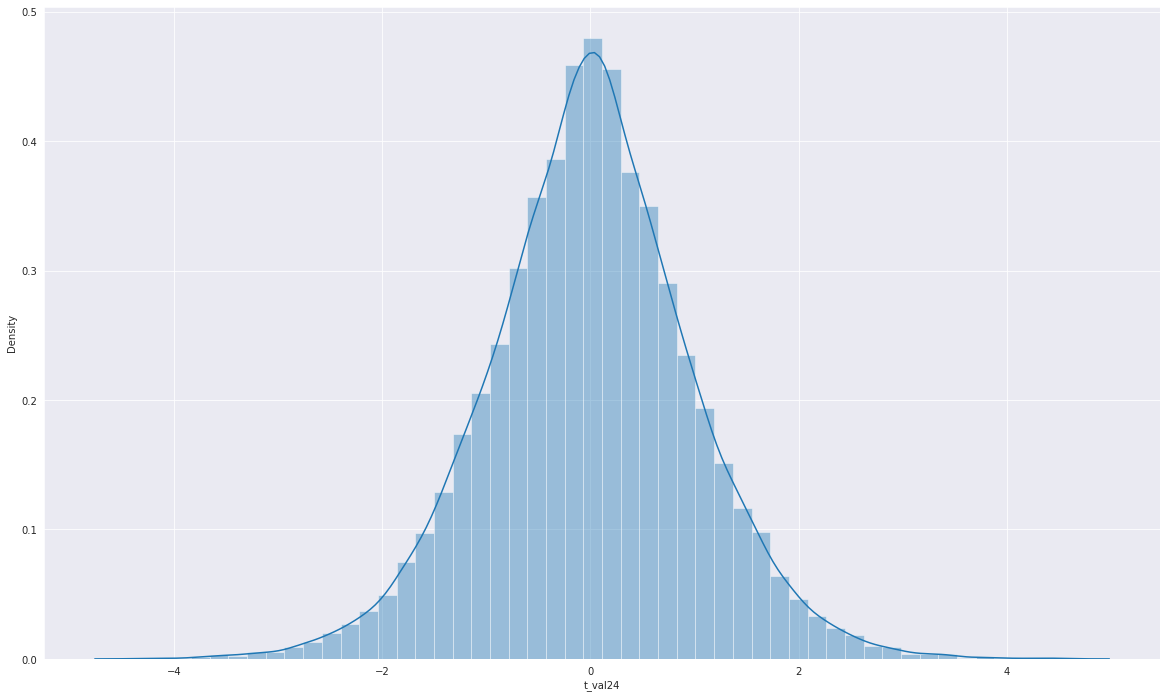

In [ ]:
a4_dims = (20,12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(df.t_val24)

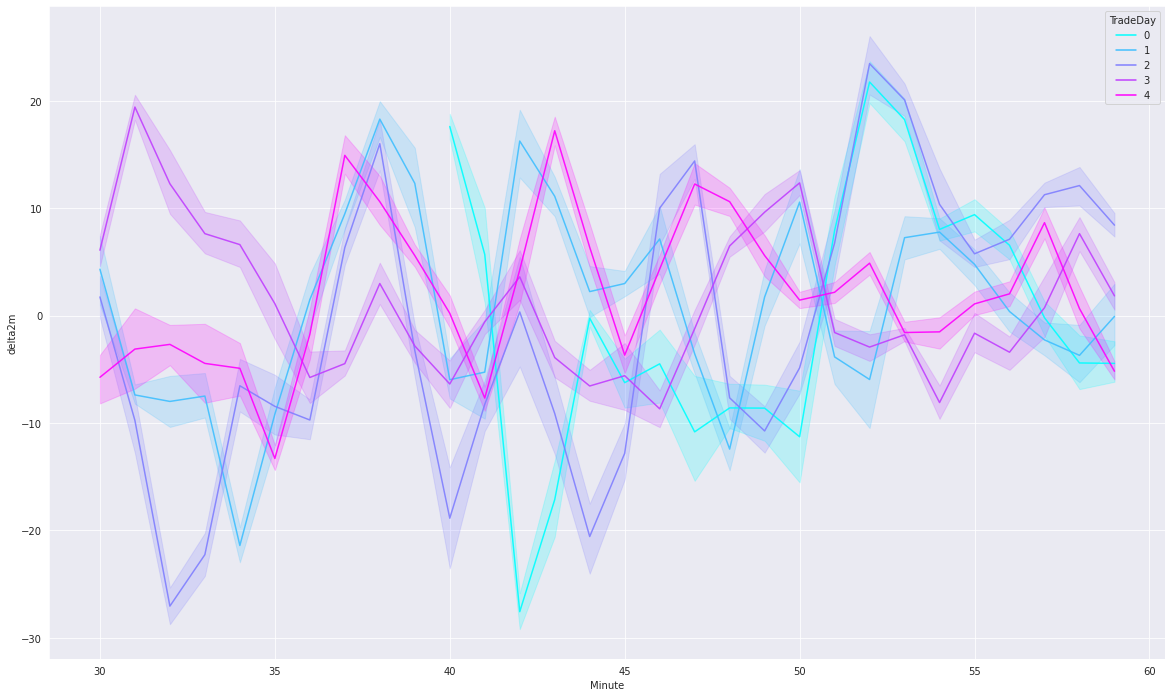

In [ ]:
data=df[df.Hour==9]
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x=data.Minute, y=data.delta2m, hue=data.TradeDay, palette="cool", dashes=False, alpha=0.9)

In [ ]:
df.columns

Index(['open', 'close', 'high', 'low', 'avg', 'volume', 'Time', 'Hour',
       'Minute', 'Second', 'Day', 'TradeDay', 'dev', 'delta1m', 'delta2m',
       'delta5m', 'delta10m', 'std24', 'mean24', 't_val24', 'pb30sec', 'pbmin',
       'pb5min', 'pb10min', 'pf10sec', 'pf30sec', 'pfmin', 'pf2min', 'pf5min'],
      dtype='object')

In [ ]:
for index, row in df.iterrows():
  if row["t_val24"] > 2:
    print(row["avg"])

12273.35
12247.0
12250.4
12241.475
12262.625
12265.2
12254.975
12257.275
12264.075
12259.15
12239.425
12249.55
12237.55
12230.8
12235.075
12232.625
12231.6
12202.925
12192.5
12162.8
12139.875
12098.525
12100.8
12130.6
12128.6
12143.25
12148.5
12158.625
12161.7
12169.375
12166.05
12170.4
12179.35
12172.675
12160.85
12140.325
12144.75
12151.7
12180.925
12186.525
12189.025
12202.425
12194.075
12191.575
12188.4
12187.675
12187.15
12187.6
12184.8
12191.1
12205.1
12192.15
12194.9
12204.775
12201.875
12211.75
12206.625
12207.975
12198.15
12209.55
12208.475
12207.025
12215.65
12214.525
12225.825
12221.825
12217.625
12215.1
12210.175
12213.725
12218.5
12221.275
12222.65
12226.2
12225.6
12226.875
12235.775
12241.15
12237.4
12237.675
12232.9
12232.425
12240.625
12242.45
12242.575
12244.875
12244.975
12251.375
12256.8
12259.95
12258.625
12262.725
12263.925
12268.825
12276.1
12265.1
12282.175
12283.775
12287.65
12278.575
12276.8
12259.8
12259.8
12265.8
12262.7
12261.675
12267.075
12264.65
12268.525